In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.load("../artifacts/data/spectrogram_features.npz")

spec_train = data['spec_train']
spec_test = data['spec_test']
spec_test = data['spec_test']
y_train = data['y_train']
y_test = data['y_test']

In [5]:
# General CNN Architecture

model = keras.Sequential()
model.add(keras.layers.Conv2D(8, (3,3), activation= 'relu', input_shape= spec_train[0].shape, padding= 'same'))
model.add(keras.layers.MaxPooling2D((4,4), padding= 'same'))
model.add(keras.layers.Conv2D(16, (3,3), activation= 'relu', padding= 'same'))
model.add(keras.layers.MaxPooling2D((4,4), padding= 'same'))
model.add(keras.layers.Conv2D(32, (3,3), activation= 'relu', padding= 'same'))
model.add(keras.layers.MaxPooling2D((4,4), padding= 'same'))
model.add(keras.layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(keras.layers.MaxPooling2D((4,4), padding= 'same'))
model.add(keras.layers.Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(keras.layers.MaxPooling2D((4,4), padding= 'same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(64, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1025, 1293, 8)     80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 257, 324, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 257, 324, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 65, 81, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 81, 32)        4640      


                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 6, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
          

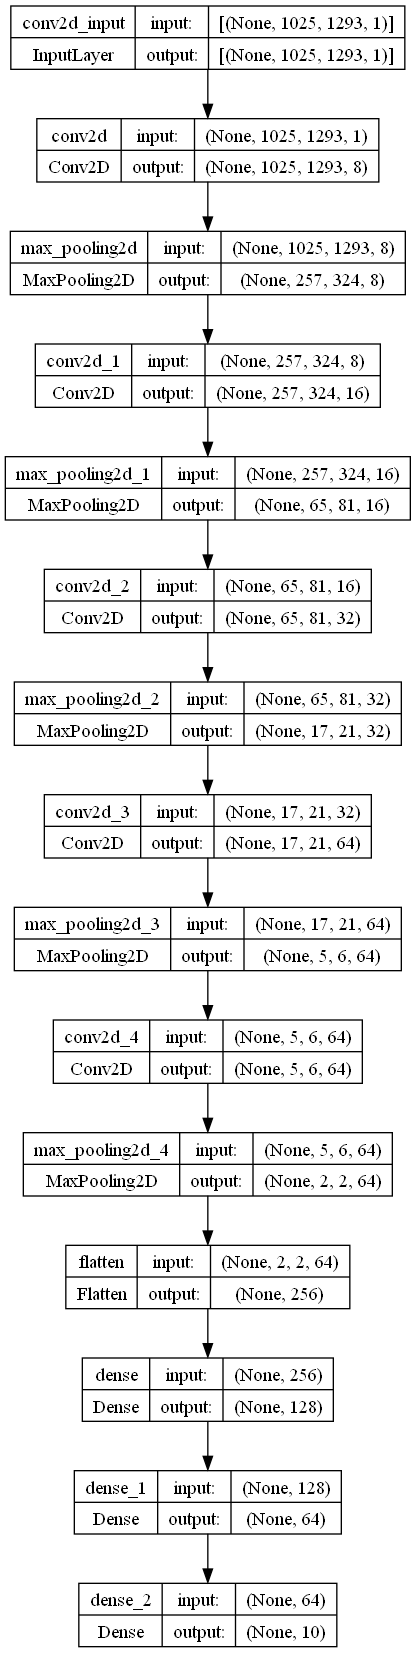

In [7]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [9]:
model.fit(spec_train, y_train, epochs=10, batch_size=8, verbose=1)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

24/24 [==============================] - 25s 855ms/step
Train Accuracy:  349 / 755  =  46.23 %
6/6 [==============================] - 7s 825ms/step
Test Accuracy:  76 / 189  =  40.21 %


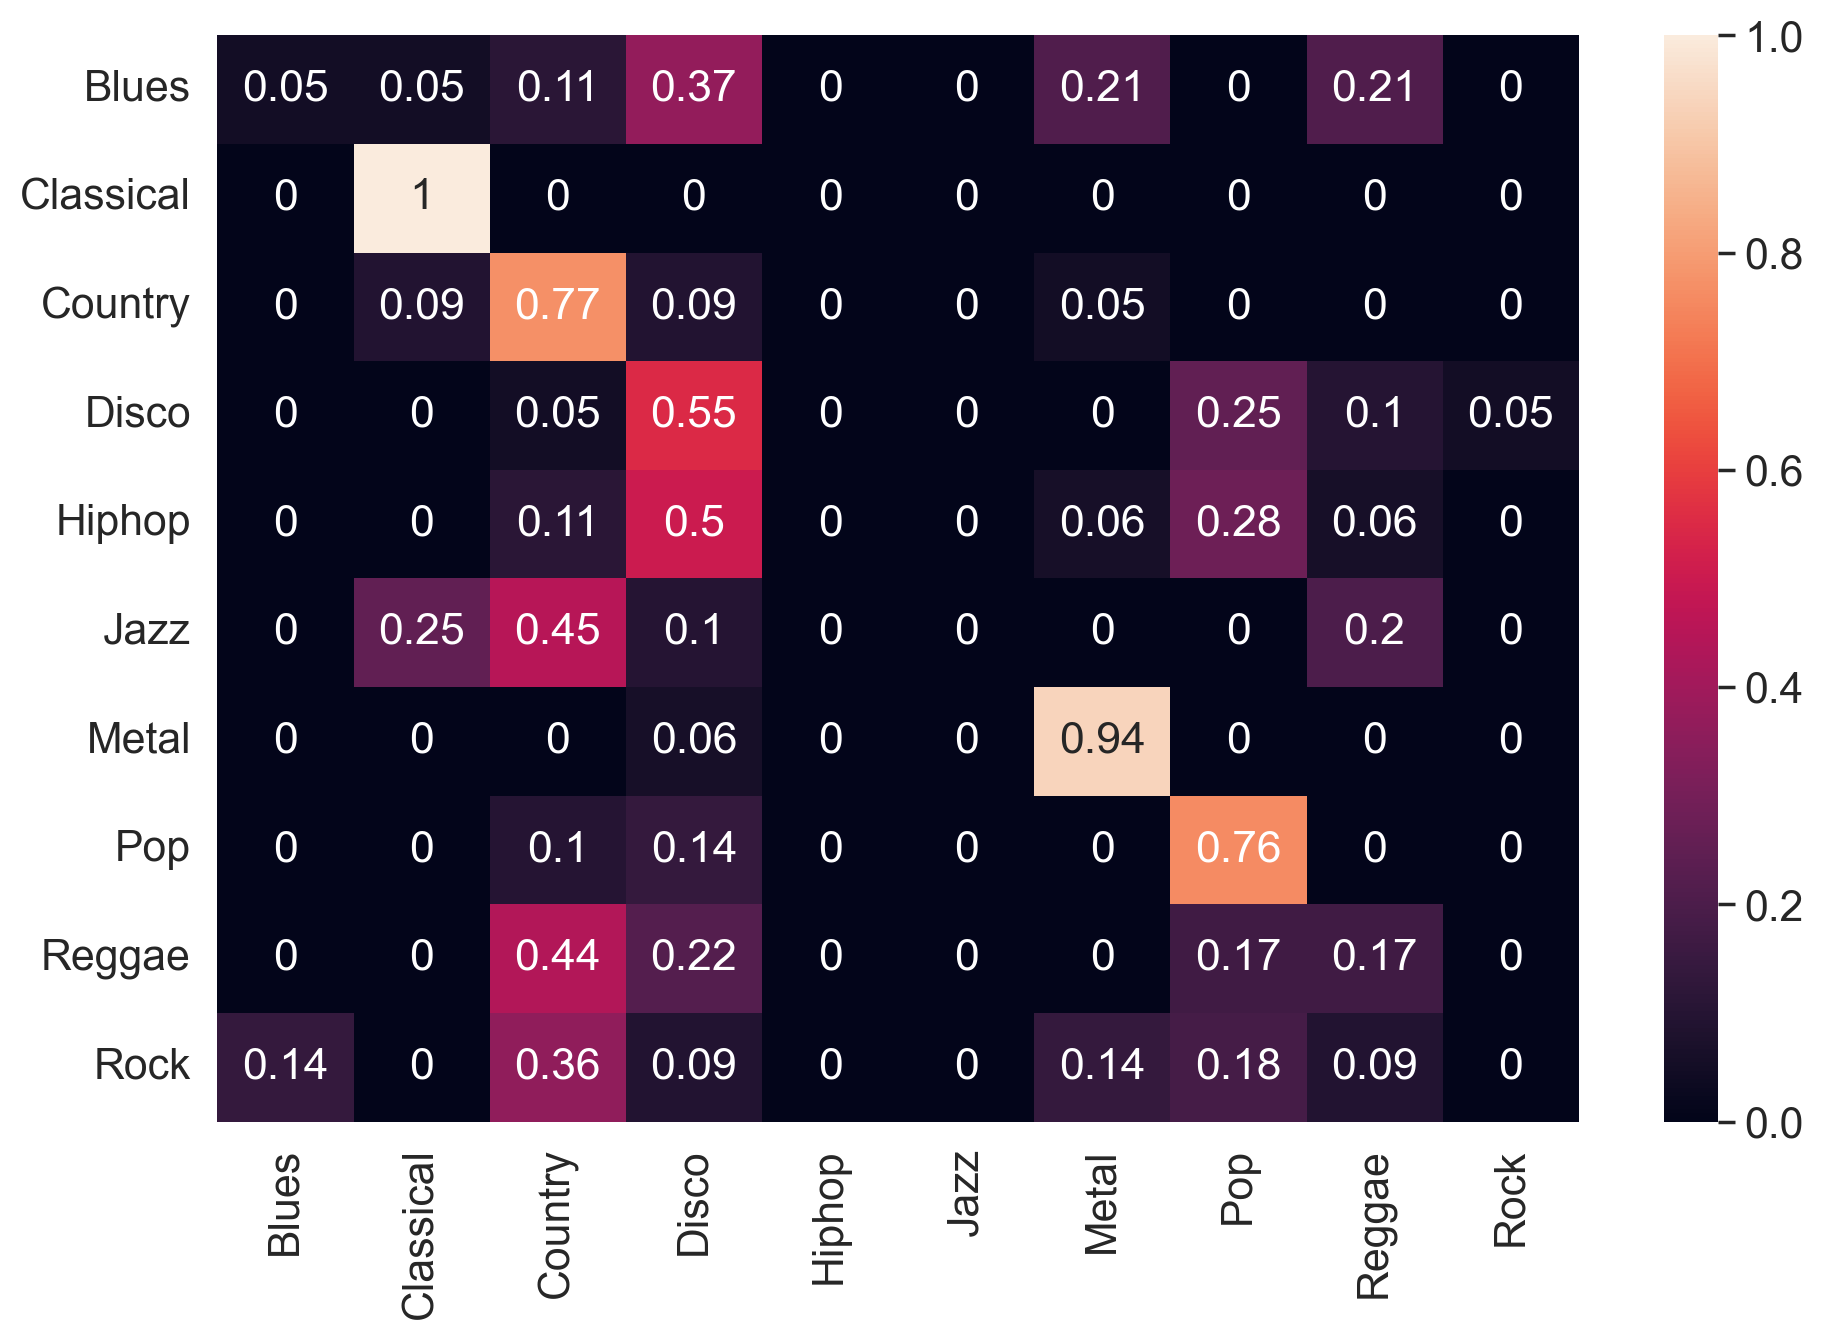

In [17]:
# Training Accuracy
y_pred = model.predict(spec_train)
y_pred = np.argmax(y_pred, axis= -1)
y_true = np.argmax(y_train, axis= -1)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Train Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

# # Testing Accuracy
y_pred = model.predict(spec_test)
y_pred = np.argmax(y_pred, axis= -1)
y_true = np.argmax(y_test, axis= -1)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Test Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat = confusion_matrix(y_true, y_pred, normalize= 'true')
conf_mat = np.round(conf_mat, 2)

conf_mat_df = pd.DataFrame(conf_mat, columns= class_names, index= class_names)

plt.figure(figsize = (10,7), dpi = 200)
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/new_spec_conf_mat1.png")

In [ ]:
# Can train another CNN model for spectrogram and ensemble it.